In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QUANTAXIS as QA

In [39]:
#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,8]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
df=QA.QAFetch.QATdx.QA_fetch_get_stock_day('000002','2018-01-01','2018-12-31')
df.head()

QUANTAXIS>> Selecting the Best Server IP of TDX
QUANTAXIS>> === The BEST SERVER ===
 stock_ip 180.153.39.51 future_ip 106.14.95.149


USING DEFAULT STOCK IP
USING DEFAULT FUTURE IP


,open,close,high,low,vol,amount,date,code,date_stamp
date,,,,,,,,,
2018-01-02,31.45,32.56,32.99,31.45,683433.0,2.218503e+09,2018-01-02,000002,1.514822e+09
2018-01-03,32.50,32.33,33.78,32.23,646870.0,2.130250e+09,2018-01-03,000002,1.514909e+09
2018-01-04,32.76,33.12,33.53,32.10,529085.0,1.740602e+09,2018-01-04,000002,1.514995e+09
2018-01-05,32.98,34.76,35.88,32.80,843101.0,2.916788e+09,2018-01-05,000002,1.515082e+09
2018-01-08,35.11,35.99,36.96,35.11,830783.0,2.994516e+09,2018-01-08,000002,1.515341e+09


In [10]:
#计算日收益
df['daily_return']=df['close']/df['close'].shift(1)-1
df[['close','daily_return']].head()

,close,daily_return
date,,
2018-01-02,32.56,NaN
2018-01-03,32.33,-0.007064
2018-01-04,33.12,0.024436
2018-01-05,34.76,0.049517
2018-01-08,35.99,0.035386


In [5]:
#后复权日数据
df_hfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day('000002','2018-01-01','2018-12-31','02')

In [6]:
#前复权日数据
df_qfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day('000002','2018-01-01','2018-12-31','01')

In [9]:
df_all=df[['close']].join(df_qfq[['close']],rsuffix='_qfq').join(df_hfq[['close']],rsuffix='_hfq')
df_all.head()

,close,close_qfq,close_hfq
date,,,
2018-01-02,32.56,31.336,3605.898
2018-01-03,32.33,31.114,3580.427
2018-01-04,33.12,31.875,3667.916
2018-01-05,34.76,33.453,3849.540
2018-01-08,35.99,34.637,3985.758


In [11]:
#计算日收益
df_all['daily_return']=df_all['close']/df_all['close'].shift(1)-1
df_all['daily_return_qfq']=df_all['close_qfq']/df_all['close_qfq'].shift(1)-1
df_all['daily_return_hfq']=df_all['close_hfq']/df_all['close_hfq'].shift(1)-1
df_all[['close','daily_return','close_qfq','daily_return_qfq','close_hfq','daily_return_hfq']].head()

,close,daily_return,close_qfq,daily_return_qfq,close_hfq,daily_return_hfq
date,,,,,,
2018-01-02,32.56,NaN,31.336,NaN,3605.898,NaN
2018-01-03,32.33,-0.007064,31.114,-0.007085,3580.427,-0.007064
2018-01-04,33.12,0.024436,31.875,0.024458,3667.916,0.024435
2018-01-05,34.76,0.049517,33.453,0.049506,3849.540,0.049517
2018-01-08,35.99,0.035386,34.637,0.035393,3985.758,0.035386


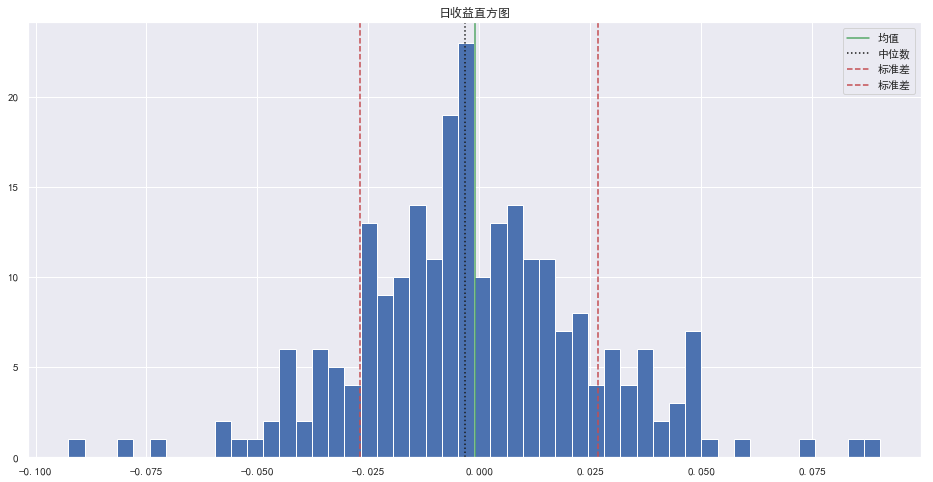

In [40]:
#使用直方图查看日收益
df_all['daily_return'].hist(bins=50)
#均值
mean = df_all['daily_return'].mean()
#中位数
median=df_all['daily_return'].median()
#标准差
std = df_all['daily_return'].std()
plt.axvline(mean, color='g',label='均值')
plt.axvline(median,color='k',linestyle=':',label='中位数')
plt.axvline(std,color='r',linestyle='--',label='标准差')
plt.axvline(-1*std,color='r',linestyle='--',label='标准差')
plt.title('日收益直方图')
plt.legend()

In [37]:
mean,std

(-0.0009325841906753285, 0.02682198673248983)

In [146]:
def plot_close_line_and_high(symbol,s,e,plot=True):
    df=QA.QAFetch.QATdx.QA_fetch_get_stock_day(symbol,s,e)
    #最高点
    m=df[df['close']==df['close'].max()]
#     print(m)
    # df['close'].plot(figsize=[18,5])
    if plot:
        plt.plot(df.index,df['close'],label='收盘价')
        plt.plot(m.index,m['close'],'-o', markersize=10,label='最高值 {0}'.format(m))
        plt.xticks(())
        plt.title('{0} ~ {1}间收盘价变化'.format(s,e))
        plt.legend()
    return df,m

---

[关于证券收益分布原因的讨论](https://www.ricequant.com/community/topic/126/)

[峰度（Kurtosis）和偏度（Skewness） - 吴锐的博文](http://blog.sciencenet.cn/blog-3083238-1057463.html)

[峰度 - 维基百科](https://zh.wikipedia.org/wiki/%E5%B3%B0%E5%BA%A6)

在统计学中，峰度（Kurtosis）衡量实数随机变量概率分布的峰态。峰度高就意味着方差增大是由低频度的大于或小于平均值的极端差值引起的。

[偏度 - 维基百科](https://zh.wikipedia.org/wiki/%E5%81%8F%E5%BA%A6)

* 偏度为负（负偏态）就意味着在概率密度函数左侧的尾部比右侧的长，绝大多数的值（不一定包括中位数在内[1]）位于平均值的右侧。

* 偏度为正（正偏态）就意味着在概率密度函数右侧的尾部比左侧的长，绝大多数的值（不一定包括中位数[1]）位于平均值的左侧。

* 偏度为零就表示数值相对均匀地分布在平均值的两侧，但不一定意味着其为对称分布。

---
## 2006~2009 之间一波上涨和下跌区间的峰度和偏度

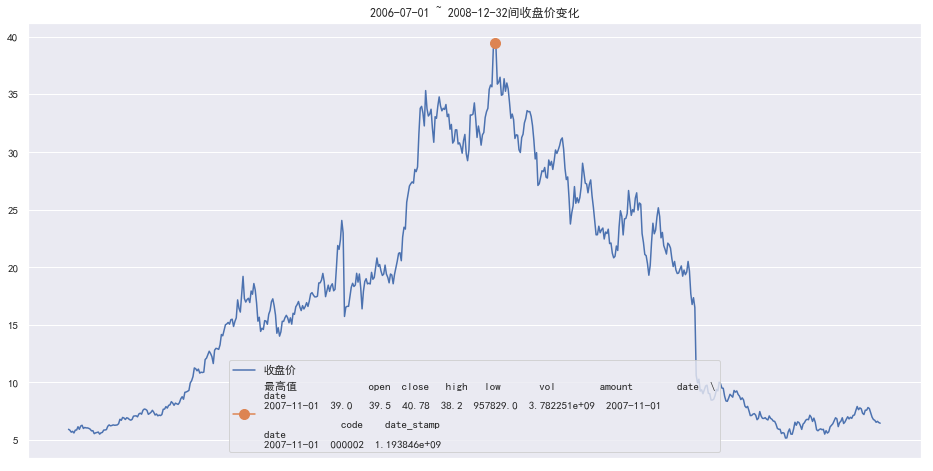

In [143]:
df,m=plot_close_line_and_high('000002','2006-07-01','2008-12-32')

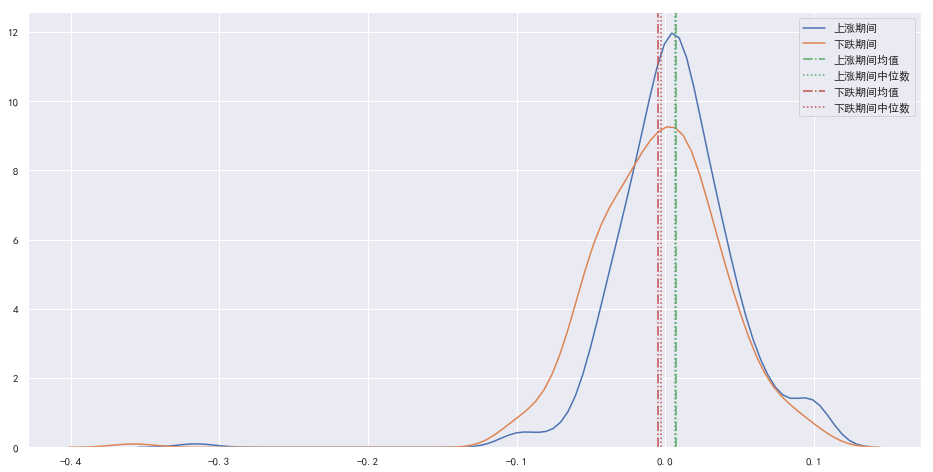

In [95]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2007-11-01','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2007-11-01':,'daily_return'].dropna(),label='下跌期间')
plt.axvline(df.loc[:'2007-11-01','daily_return'].mean(),color='g',linestyle='-.',label='上涨期间均值')
plt.axvline(df.loc[:'2007-11-01','daily_return'].median(),color='g',linestyle=':',label='上涨期间中位数')
plt.axvline(df.loc['2007-11-01':,'daily_return'].mean(),color='r',linestyle='-.',label='下跌期间均值')
plt.axvline(df.loc['2007-11-01':,'daily_return'].median(),color='r',linestyle=':',label='下跌期间中位数')
plt.legend()

In [92]:
print('上涨区间 峰度：{0}。'.format(df.loc[:'2007-11-01','daily_return'].kurtosis()))
print('上涨区间 偏度：{0}。'.format(df.loc[:'2007-11-01','daily_return'].skew()))
print('上涨区间 均值：{0}。'.format(df.loc[:'2007-11-01','daily_return'].mean()))
print('上涨区间 中位数：{0}。'.format(df.loc[:'2007-11-01','daily_return'].median()))
print('上涨期间 均值>中位数 {0}'.format(df.loc[:'2007-11-01','daily_return'].mean()>df.loc[:'2007-11-01','daily_return'].median()))
print('---')
print('下跌区间 峰度：{0}。'.format(df.loc['2007-11-01':,'daily_return'].kurtosis()))
print('下跌区间 偏度：{0}。'.format(df.loc['2007-11-01':,'daily_return'].skew()))
print('下跌区间 均值：{0}。'.format(df.loc['2007-11-01':,'daily_return'].mean()))
print('下跌区间 中位数：{0}。'.format(df.loc['2007-11-01':,'daily_return'].median()))
print('下跌区间 均值>中位数 {0}'.format(df.loc['2007-11-01':,'daily_return'].mean()>df.loc['2007-11-01':,'daily_return'].median()))

上涨区间 峰度：12.08217610931427。
上涨区间 偏度：-1.3735609279118486。
上涨区间 均值：0.0069100996668217595。
上涨区间 中位数：0.0063482466747279975。
上涨期间 均值>中位数 True
---
下跌区间 峰度：11.81778599066152。
下跌区间 偏度：-1.546386375959477。
下跌区间 均值：-0.005165490358187737。
下跌区间 中位数：-0.002996390864037912。
下跌区间 均值>中位数 False


---
## 2017~2019 之间一波上涨和下跌区间的峰度和偏度

            open  close   high    low       vol        amount        date  \
date                                                                        
2018-01-24  40.7  41.13  42.24  40.46  542629.0  2.236497e+09  2018-01-24   

              code    date_stamp  
date                              
2018-01-24  000002  1.516723e+09  


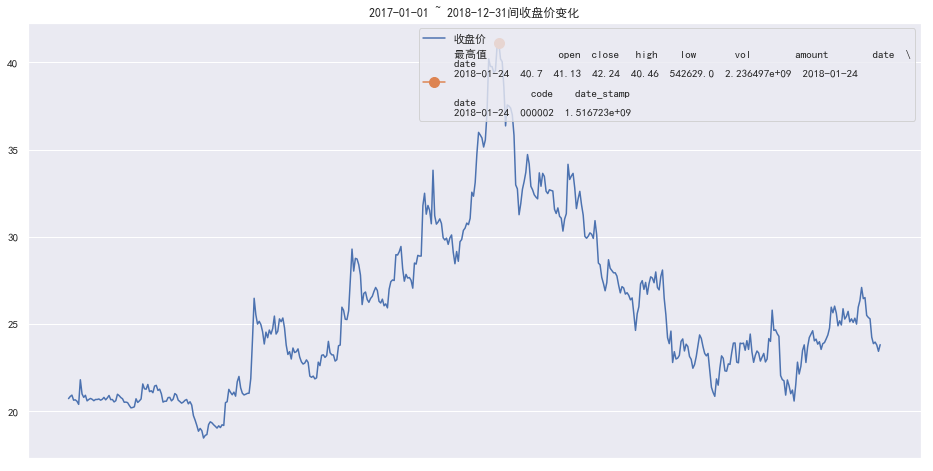

In [141]:
df,m=plot_close_line_and_high('000002','2017-01-01','2018-12-31')

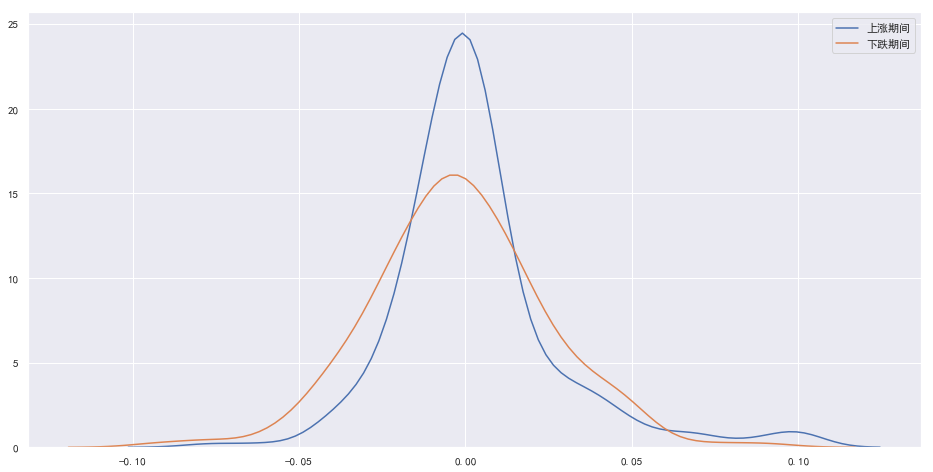

In [63]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2018-01-24','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2018-01-24':,'daily_return'].dropna(),label='下跌期间')

In [64]:
print('上涨区间 峰度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].kurtosis()))
print('下跌区间 峰度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].kurtosis()))

print('上涨区间 偏度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].skew()))
print('下跌区间 偏度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].skew()))

上涨区间 峰度：4.210246215508908。
下跌区间 峰度：0.9439094206521861。
上涨区间 偏度：1.3622874835741503。
下跌区间 偏度：0.04918434437032434。


---
## 2015~2019 之间震荡区间及一波上涨和下跌区间的峰度和偏度

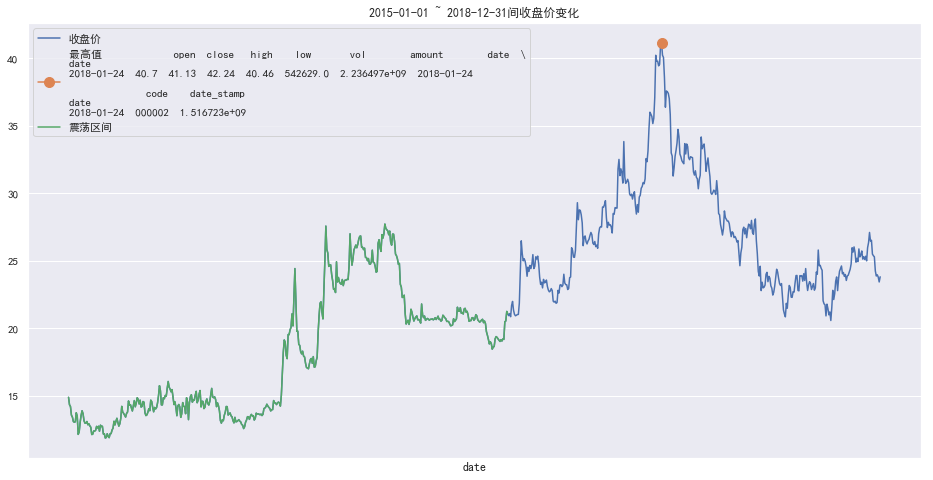

In [161]:
df,m=plot_close_line_and_high('000002','2015-01-01','2018-12-31')
df.loc[:'2017-06-01','close'].plot(label='震荡区间')
plt.legend()

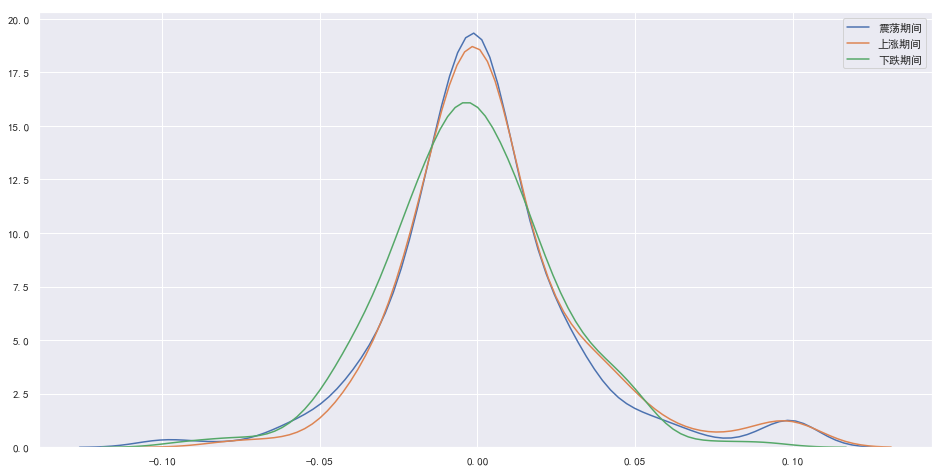

In [163]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2017-06-01','daily_return'].dropna(),label='震荡期间')
sns.kdeplot(df.loc['2017-06-01':'2018-01-24','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2018-01-24':,'daily_return'].dropna(),label='下跌期间')

In [79]:
print('震荡区间 峰度：{0}。'.format(df.loc[:'2017-06-01','daily_return'].kurtosis()))
print('震荡区间 偏度：{0}。'.format(df.loc[:'2017-06-01','daily_return'].skew()))
print('---')
print('上涨区间 峰度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].kurtosis()))
print('上涨区间 偏度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].skew()))
print('---')
print('下跌区间 峰度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].kurtosis()))
print('下跌区间 偏度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].skew()))

震荡区间 峰度：2.9023901840897866。
震荡区间 偏度：0.6475723286173728。
---
上涨区间 峰度：2.8207306332622304。
上涨区间 偏度：0.7435389826062845。
---
下跌区间 峰度：0.9439094206521861。
下跌区间 偏度：0.04918434437032434。


---
## 利用散点图显示日收益


In [180]:
df['close_000300']=QA.QAFetch.QATdx.QA_fetch_get_index_day('000300','2015-01-01','2018-12-31')['close']
df['daily_return_000300']=df['close_000300']/df['close_000300'].shift(1)-1

QUANTAXIS>> 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


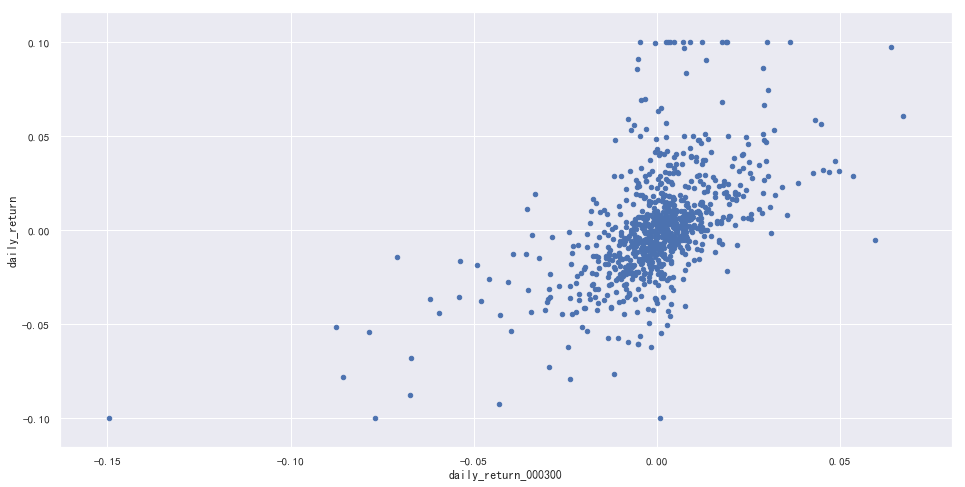

In [184]:
# 绘制 000002 相对于 000300 的散点图
df.plot(kind='scatter',x='daily_return_000300', y='daily_return')

## 贝他值（ β 值）：

用以衡量基金之市场风险，或称系统性风险。其计算的方式为以过去12个月或24个月之基金月报酬率对同期市场月报酬率做回归，估计斜率系数而得。

* 当 β >1（β < -1），表示基金坡动度较指数为大，当指数上扬 10%（下跌10%），基金会上扬超过 10%（下跌超过10%）；

* 当 β = 1，表示指数涨跌多少，基金就跟着变动多少。

[Beta系数](zh.wikipedia.org/wiki/Beta%E7%B3%BB%E6%95%B0)

## 阿尔法系数（ α）

是基金的实际收益和按照β系数计算的期望收益之间的差额。

其计算方法如下：超额收益是基金的收益减去无风险投资收益（在中国为1年期银行定期存款收益）；期望收益是贝塔系数 β 和市场收益的乘积，反映基金由于市场整体变动而获得的收益；超额收益和期望收益的差额即 α 系数。**该系数越大越好。**

[阿尔法系数](zh.wikipedia.org/wiki/%E8%AF%81%E5%88%B8%E6%8A%95%E8%B5%84%E5%9F%BA%E9%87%91#%E9%98%BF%E5%B0%94%E6%B3%95%E7%B3%BB%E6%95%B0)

In [187]:
# beta系数和alpha系数
beta, alpha = np.polyfit(df['daily_return_000300'].dropna(), df['daily_return'].dropna(), 1)
beta, alpha

(0.9664374959201176, 0.0010521372609809546)